In [1]:
import torch
from torch.utils.data import Dataset 
import numpy as np 
import os
import matplotlib.pyplot as plt
import sys
import random 
sys.path.append('../') 
from dataset_crosses import RandomCrossDataset, draw_x,RandomXDataset

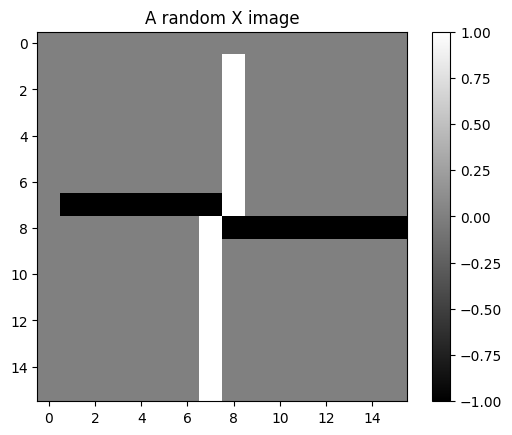

In [2]:
# Create and display the X
x_image = draw_x(angle=random.uniform(0, np.pi))
plt.imshow(x_image, cmap='gray')
plt.title("A random X image")
plt.colorbar()
plt.show()

Dataset element shape: torch.Size([1, 1, 32, 32])


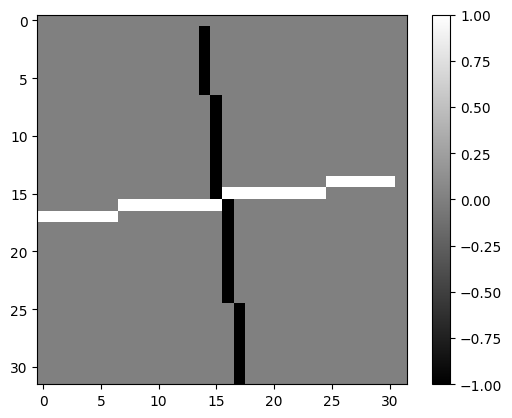

In [3]:
dataset = RandomXDataset(size=32, length=100)
dataset_element = dataset[0]
print("Dataset element shape:", dataset_element.shape)
plt.imshow(dataset_element.squeeze(), cmap='gray', vmin=-1, vmax=1)
plt.colorbar()

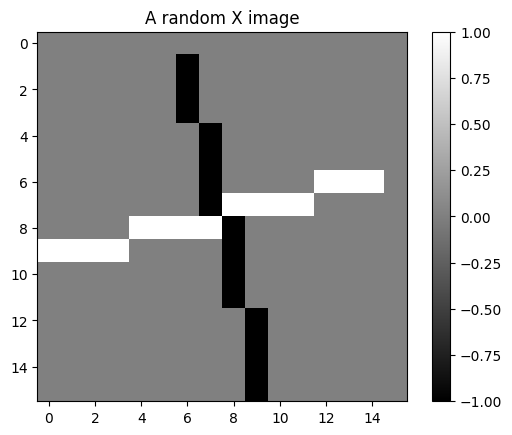

In [4]:
# Create and display the X
x_image = draw_x(angle=random.uniform(0, np.pi))
plt.imshow(x_image, cmap='gray')
plt.title("A random X image")
plt.colorbar()
plt.show()

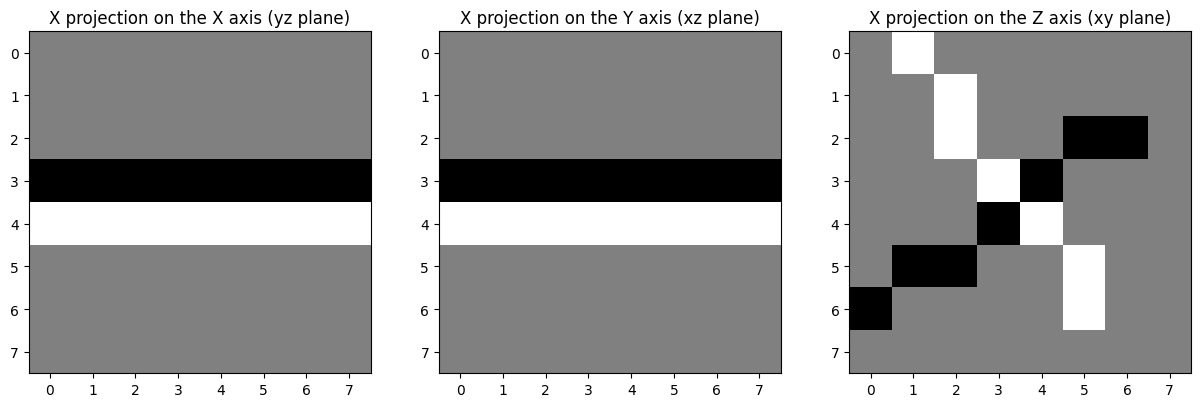

In [5]:
dataset_element = RandomCrossDataset((8,8,8))[0]

fig, axis = plt.subplots(1,3,figsize=(15,5))    
axis[0].imshow(dataset_element[0][4,:,:], vmin=-1, vmax=1, cmap='gray')
axis[1].imshow(dataset_element[0][:,4,:], vmin=-1, vmax=1, cmap='gray')
axis[2].imshow(dataset_element[0][:,:,4], vmin=-1, vmax=1, cmap='gray')

axis[0].set_title("X projection on the X axis (yz plane)")
axis[1].set_title("X projection on the Y axis (xz plane)")
axis[2].set_title("X projection on the Z axis (xy plane)")

plt.show()

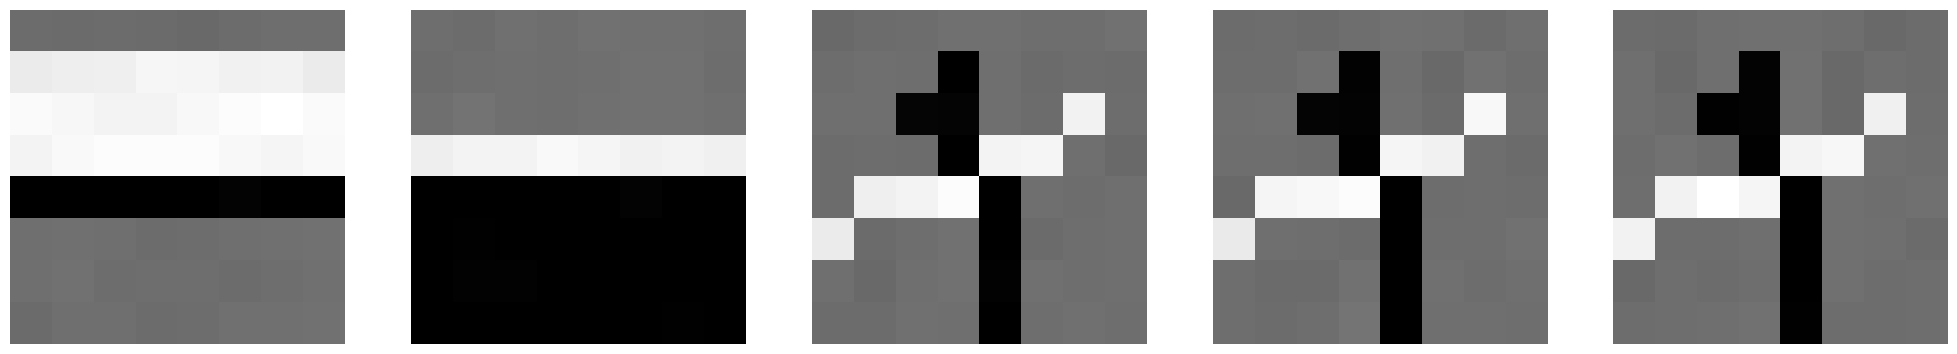

In [31]:
batch = 0 
# results folder
results_folder = '/home/pedro/Desktop/Repos/SilverFox/results_3D/model'
output = np.load(os.path.join(results_folder, 'output-9.npy'), allow_pickle=True)

fig, axis = plt.subplots(1,5,figsize=(25,5))
half_point = int(output.shape[1]/2)
axis[0].imshow(output[batch][half_point,:,:], vmin=-1, vmax=1, cmap='gray')
axis[1].imshow(output[batch][:,half_point,:], vmin=-1, vmax=1, cmap='gray')
axis[2].imshow(output[batch][:,:,half_point//2], vmin=-1, vmax=1, cmap='gray')
axis[3].imshow(output[batch][:,:,half_point], vmin=-1, vmax=1, cmap='gray')
axis[4].imshow(output[batch][:,:,half_point + half_point//2], vmin=-1, vmax=1, cmap='gray')

for ax in axis.flatten(): 
    ax.axis('off')

In [18]:
import numpy as np 
import os
import matplotlib.pyplot as plt
# results folder
results_folder = '/home/pedro/Desktop/Repos/SilverFox/results_3D/model'
output = np.load(os.path.join(results_folder, 'output-25.npy'), allow_pickle=True)

for batch in output.shape[0]:
    fig, axis = plt.subplots(1,3,figsize=(15,5))
    half_point = int(output.shape[1]/2)
    axis[0].imshow(output[batch][half_point,:,:], vmin=-1, vmax=1)
    axis[1].imshow(output[batch][:,half_point,:], vmin=-1, vmax=1)
    axis[2].imshow(output[batch][:,:,half_point], vmin=-1, vmax=1)
    axis[0].set_title("X projection on the X axis (yz plane)")
    axis[1].set_title("X projection on the Y axis (xz plane)")
    axis[2].set_title("X projection on the Z axis (xy plane)")
    # save the figure 
    plt.savefig(os.path.join(results_folder, 'output-20.png'))
    

TypeError: 'int' object is not iterable

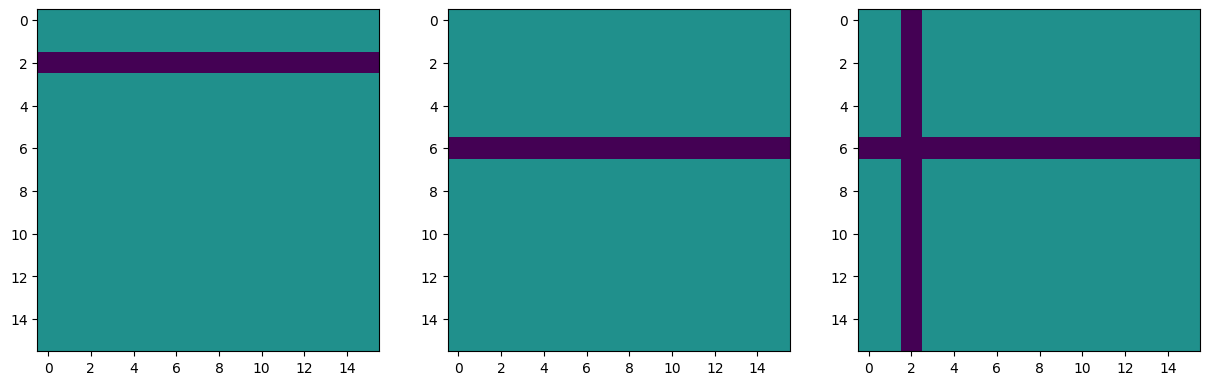

In [ ]:
from glob import glob 
import numpy as np
import os 

path_to_dataset = '/home/pedro/Desktop/Repos/SilverFox_data/numpy_dataset_2D_128_classes' 
path_to_output = '/home/pedro/Desktop/Repos/SilverFox_data/3D_data'

# load all the files 
for patient_number in range(0,185):
    files = glob(path_to_dataset + f'/patient_{patient_number}_class_*.npy')
    
    if not files: 
        print(f'Patient {patient_number} has no files')
        continue
    
    files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))
    
    list_of_numpys = [] 
    for file in files: 
        list_of_numpys.append(np.load(file, allow_pickle=True))
    
    # concatenate all the numpy arrays
    data = np.stack(list_of_numpys)
    print(data.shape)
    
    # save the numpy array
    np.save(os.path.join(path_to_output, f'patient_{patient_number}.npy'), data) 


In [8]:
import sys
sys.path.append('/home/pedro/Desktop/Repos/SilverFox')
from datasets.dataset_alien import Simply3D 
 
dataset = Simply3D('/home/pedro/Desktop/Repos/SilverFox_data/3D_data', output_size=32, depth_size=32)
dataset[0].max(), dataset[0].min(), dataset[0].shape

(0.5676764, -1.0, (1, 32, 32, 32))

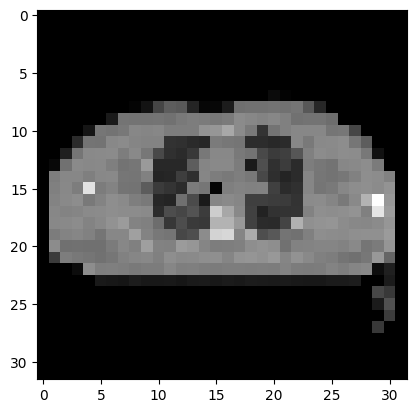

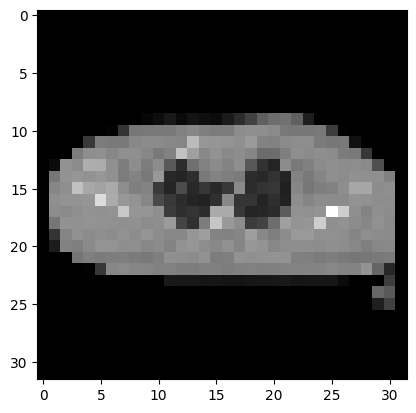

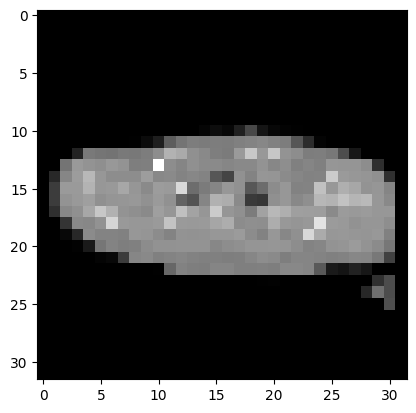

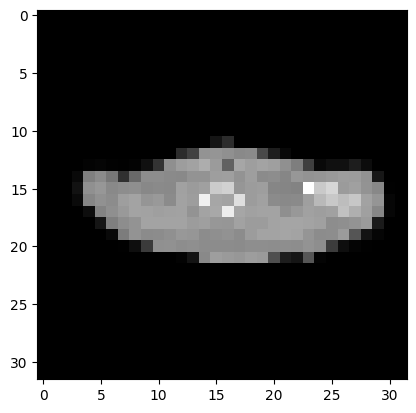

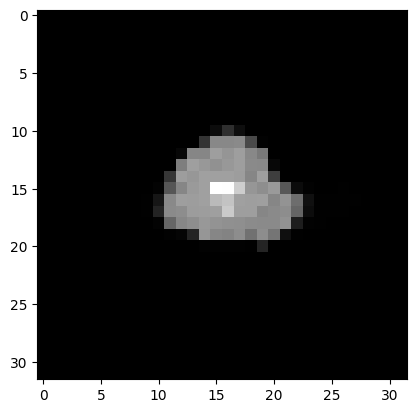

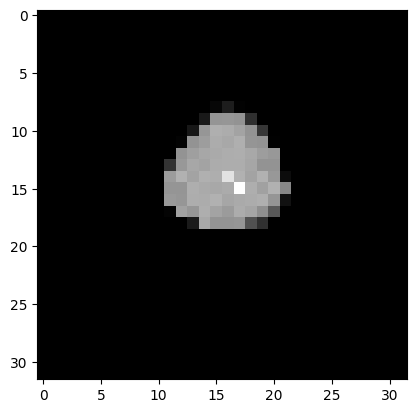

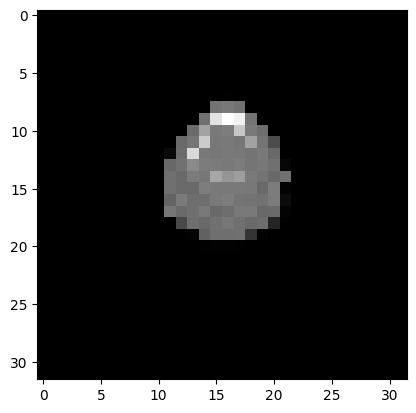

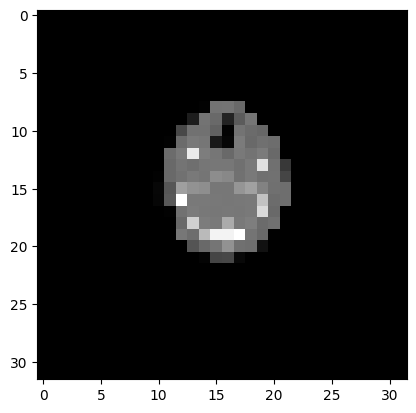

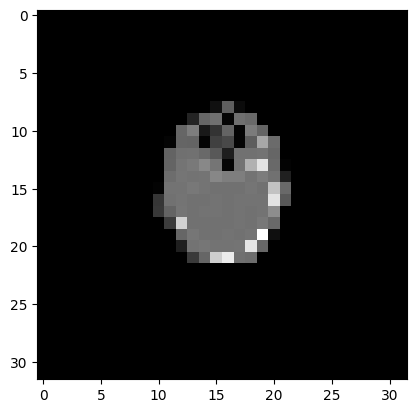

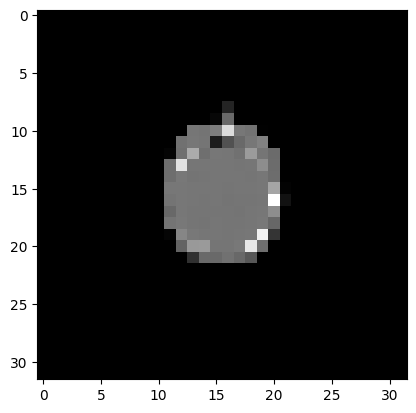

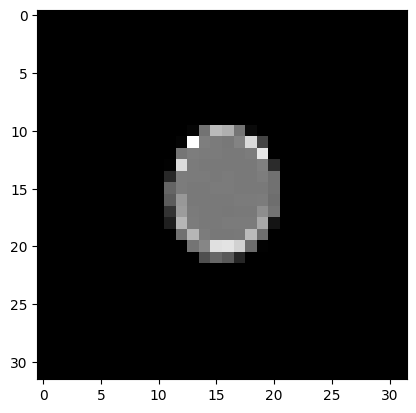

In [9]:
import matplotlib.pyplot as plt
image = dataset[0]
image = image.squeeze()
for i in range(0,image.shape[0],image.shape[0]//10):
    plt.imshow(image[i,:,:], cmap='gray')
    plt.show()


In [ ]:
# local_path = "/DATA/j622s/new_dataset_6/numpy_dataset_2D_128_classes"
# image_size = 512 
# dataset = SimplyNumpyDataset4(local_path, image_size)
# item = dataset[900]

# plt.imshow(item[0][0])
# plt.title(item[1])

In [2]:
import sys
sys.path.append('/home/pedro/Desktop/Repos/SilverFox')
from datasets.dataset_alien import SimplyNumpyDataset4 
 
dataset = SimplyNumpyDataset4('/home/pedro/Desktop/Repos/SilverFox_data/numpy_dataset_2D_128_classes', output_size=512)
dataset[0][0].max(), dataset[0][0].min(), dataset[0][0].shape

(0.566707, -1.0, (1, 512, 512))

In [ ]:
# import matplotlib.pyplot as plt 
# for index, element in enumerate(dataset): 
#     plt.imshow(element[0][0], cmap='gray')
#     plt.title(element[1])
#     plt.show()
    
#     if index > 100: 
#         break